In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [32]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

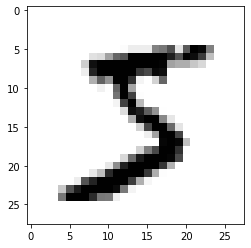

In [33]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [34]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # probability distribution

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 1s 664us/step - loss: 0.2610 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 1s 664us/step - loss: 0.1056 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 1s 663us/step - loss: 0.0730 - accuracy: 0.9764


In [36]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 449us/step - loss: 0.0848 - accuracy: 0.9737
0.08484712243080139 0.9736999869346619


In [37]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [38]:
new_model = tf.keras.models.load_model('num_reader.model')

In [39]:
predictions = new_model.predict([x_test])

In [40]:
print(predictions[10])

[9.9978441e-01 8.9865068e-08 2.0115063e-04 6.8704393e-09 2.6732963e-08
 1.8511097e-06 1.5838924e-06 8.2747956e-06 5.4478764e-09 2.5731163e-06]


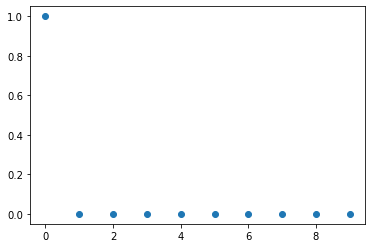

In [45]:
plt.scatter(range(10), predictions[10])

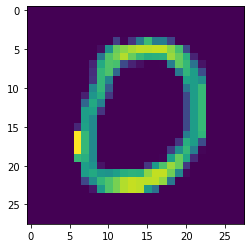

In [46]:
plt.imshow(x_test[10])